<h2 align="center"> Titanic Survival  </h2>

### Objective:   Perform Different Pre-Processing Techniques

Pre-processing techniques include:
- 1.Handling Missing Data
- 2.Removing Outliers
- 3.Encoding Categorical Text Variables
- 4.Feature Scaling

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('Datasets and Dot Files/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking shape of dataset

In [3]:
df.shape

(891, 12)

### Checking Null Values 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* As the total 891 rows , In 'Cabin' there are more than 70% data is missing , so it is irrelevant to fill it 
* Drop  Cabin column

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
df.shape

(891, 11)

### Filling Missing Values / Handling Missing values

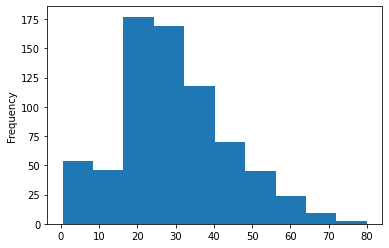

In [7]:
df['Age'].plot.hist()

* as Curve is Bell Shaped , so fill the missing values by Mean

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

* Embarked column is categorical so calculating the mode and filling it 

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We observe that max people are from S-southampton so we fill all with S

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

* Now checking missing values

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* All missing values are filled now , 

## Droping Irrelevent columns 

* As the name column contain different name and the survival is not relevant to names
* passenger Id does not make any sense
* Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [12]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*  Now data only conatin relevant columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Encoding Categorical Text Variables 

* Label Encoding it encode the value as per given instance
- Eg- columns has 3 category C/S/Q--it will form label
    suppose 0-C, 1-S, 2-Q

In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

Label Encoding():

Sometimes in the data-set we will find textual data like names, countries states, then the machine cannot do mathematical operations or cannot understand the textual data. 

So the textual data are to be converted in to numerical format which is called as label encoding. we make use of label Encoder class to convert textual data in to Numerical data.

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Spliting Data into Dependent Variable and Independent variable

In [19]:
y = df.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [40]:
X = df.drop(["Survived"],axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
x_sc = sc.fit_transform(X)

In [43]:
x_sc

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [46]:
df_x = pd.DataFrame(x_sc, columns=df.columns[1:])
df_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954


### Outlier Detection

In [50]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

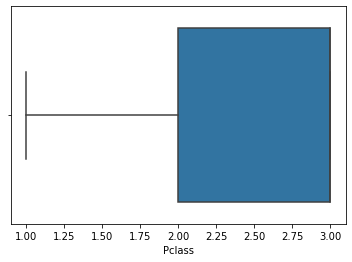

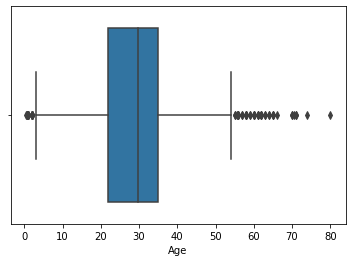

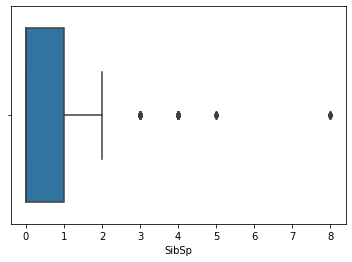

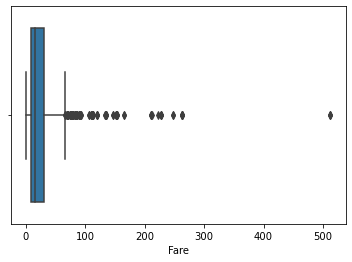

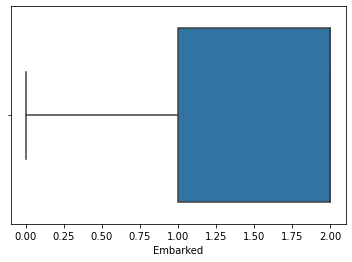

In [55]:
col = ['Pclass', 'Age', 'SibSp', 'Fare','Embarked']
for i in col:
    sns.boxplot(df[i])
    plt.show()